## Use the same people to predict

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [212]:
combined = pd.read_csv("combined.csv")

In [208]:
combined.head()

,Internal Study ID,Race,Ethnicity,Sex,Currently taking AP courses,# of AP Courses,Currently part of extracurricular activities,Club hours,Academic hours,sports hours,...,Dinner_Red Meat Protein,Dinner_Other Protein,Dinner_Dairy,Dinner_Snacks,Additional_Fruits,Additional_Vegetables,Additional_Grains,Additional_Dairy,Additional_Snacks,Next_morning_mood
0,511,4,0,1,1,2,1,3,1,4,...,1,0,0,0,0,0,1,0,1,4
1,511,4,0,1,1,2,1,3,1,4,...,1,0,0,0,0,0,1,0,1,4
2,511,4,0,1,1,2,1,3,1,4,...,0,1,0,0,0,0,1,0,1,3
3,511,4,0,1,1,2,1,3,1,4,...,1,0,0,0,0,0,1,0,1,3
4,511,4,0,1,1,2,1,3,1,4,...,0,0,1,0,0,0,1,0,1,4


In [221]:
# check the counts for each id
agg_id = combined.groupby(by='Internal Study ID').count()

In [224]:
combined= combined[combined["Internal Study ID"]==5195]
combined = combined.drop(columns="Internal Study ID")
combined.shape

(39, 48)

In [225]:
# separate label and features
from sklearn.model_selection import train_test_split

In [226]:
X = combined.drop(columns='Next_morning_mood')
y = combined["Next_morning_mood"]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [228]:
y_train.value_counts()

1    10
2     9
4     5
3     5
5     2
Name: Next_morning_mood, dtype: int64

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [230]:
scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.transform(X_test)

In [231]:
encoder = LabelEncoder()
y_train_prepared = encoder.fit_transform(y_train)
y_test_prepared = encoder.transform(y_test)

In [279]:
y_test.value_counts()

2    3
1    3
4    1
3    1
Name: Next_morning_mood, dtype: int64

In [276]:
y_train_prepared[:20]

array([1, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 3, 3, 1, 0, 0, 2, 0, 0, 3])

In [232]:
# Try svm model
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1, gamma=0.1)
svm.fit(X_train_prepared, y_train_prepared)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [233]:
print("Training accuracy is: ", svm.score(X_train_prepared, y_train_prepared))
print("Testing accuracy is: ", svm.score(X_test_prepared, y_test_prepared))

Training accuracy is:  0.9354838709677419
Testing accuracy is:  0.5


In [234]:
# logistic model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100, penalty="l1")
logreg.fit(X_train_prepared, y_train_prepared)
print("Training accuracy is: ", logreg.score(X_train_prepared, y_train_prepared))
print("Testing accuracy is: ", logreg.score(X_test_prepared, y_test_prepared))

Training accuracy is:  1.0
Testing accuracy is:  0.25


/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [235]:
# random forest
from sklearn.ensemble.forest import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 46, max_features=7, max_depth=5)
forest.fit(X_train_prepared, y_train_prepared)
print("Training accuracy is: ", forest.score(X_train_prepared, y_train_prepared))
print("Testing accuracy is: ", forest.score(X_test_prepared, y_test_prepared))

Training accuracy is:  1.0
Testing accuracy is:  0.625


In [240]:
# plot feature importance
def plot_feature_importance(model, data):
    n_features = data.shape[1]
    plt.figure(figsize=(14, 12))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(data))
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

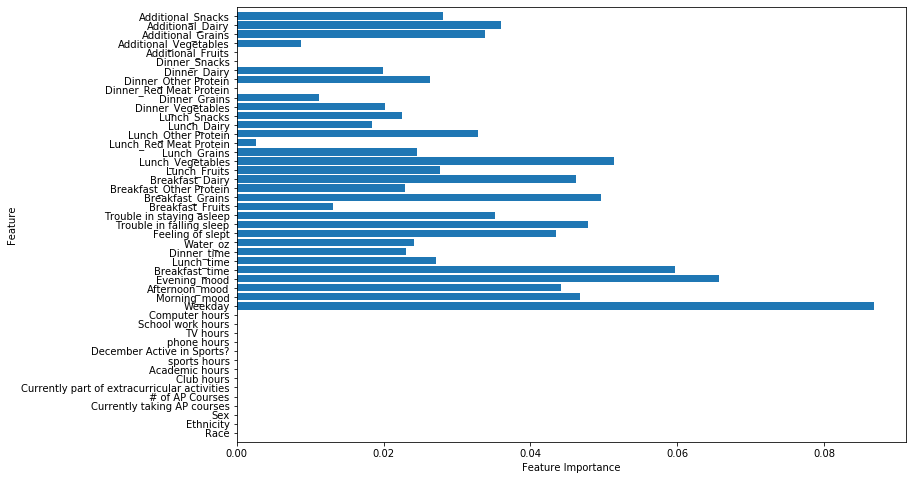

In [237]:
plot_feature_importance(forest, X_train)

In [ ]:
important_features = []
for label, feature in zip(X_train.columns, forest.feature_importances_):  ## wrong
    print(label,": ", feature)

In [242]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1, learning_rate=0.01, n_estimators=100)
gbrt.fit(X_train_prepared, y_train_prepared)
print("Training accuracy is: ", gbrt.score(X_train_prepared, y_train_prepared))
print("Testing accuracy is: ", gbrt.score(X_test_prepared, y_test_prepared))

Training accuracy is:  0.7419354838709677
Testing accuracy is:  0.625


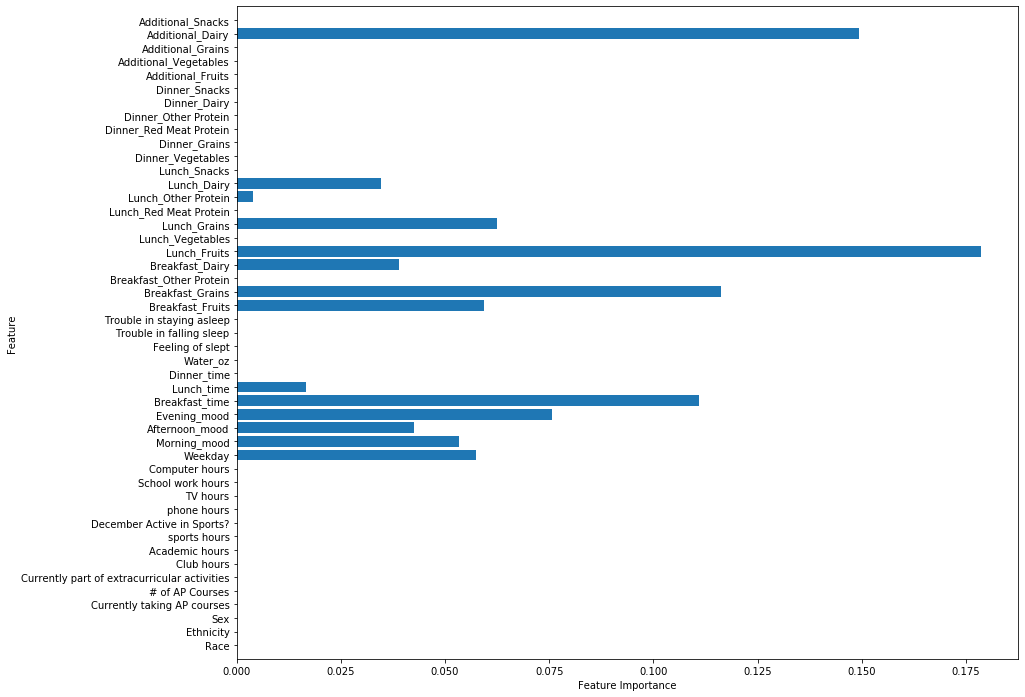

In [243]:
plot_feature_importance(gbrt, X_train)

In [89]:
important_features = []
for label, feature in zip(X_train.columns, tree.feature_importances_):  ## wrong
    print(label,": ", feature)

Race :  0.08080416927972255
Ethnicity :  0.052546008654991636
Sex :  0.0
Currently taking AP courses :  0.0
# of AP Courses :  0.0
Currently part of extracurricular activities :  0.0
Club hours :  0.030924218006721408
Academic hours :  0.0
sports hours :  0.0
December Active in Sports? :  0.02180987670849775
phone hours :  0.0
TV hours :  0.026278943889101583
School work hours :  0.02530436761265794
Computer hours :  0.0
Weekday :  0.0
Morning_mood :  0.18394965653990175
Afternoon_mood :  0.07112726987629513
Evening_mood :  0.12006672637957472
Breakfast_time :  0.05679279052270988
Lunch_time :  0.025556890117857535
Dinner_time :  0.0
Water_oz :  0.04420122747993113
Feeling of slept :  0.01827603878446012
Trouble in falling sleep :  0.0
Trouble in staying asleep :  0.0
Breakfast_Fruits :  0.0
Breakfast_Grains :  0.02579885150573922
Breakfast_Other Protein :  0.04869529051290399
Breakfast_Dairy :  0.02193124654135214
Lunch_Fruits :  0.0
Lunch_Vegetables :  0.04265730708674703
Lunch_Grain

In [261]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 46, max_depth = 3)
tree.fit(X_train_prepared, y_train_prepared)
print("Training accuracy is: ", tree.score(X_train_prepared, y_train_prepared))
print("Testing accuracy is: ", tree.score(X_test_prepared, y_test_prepared))

Training accuracy is:  0.7096774193548387
Testing accuracy is:  0.5


In [245]:
class_names = tree.classes_
class_names

array([0, 1, 2, 3, 4])

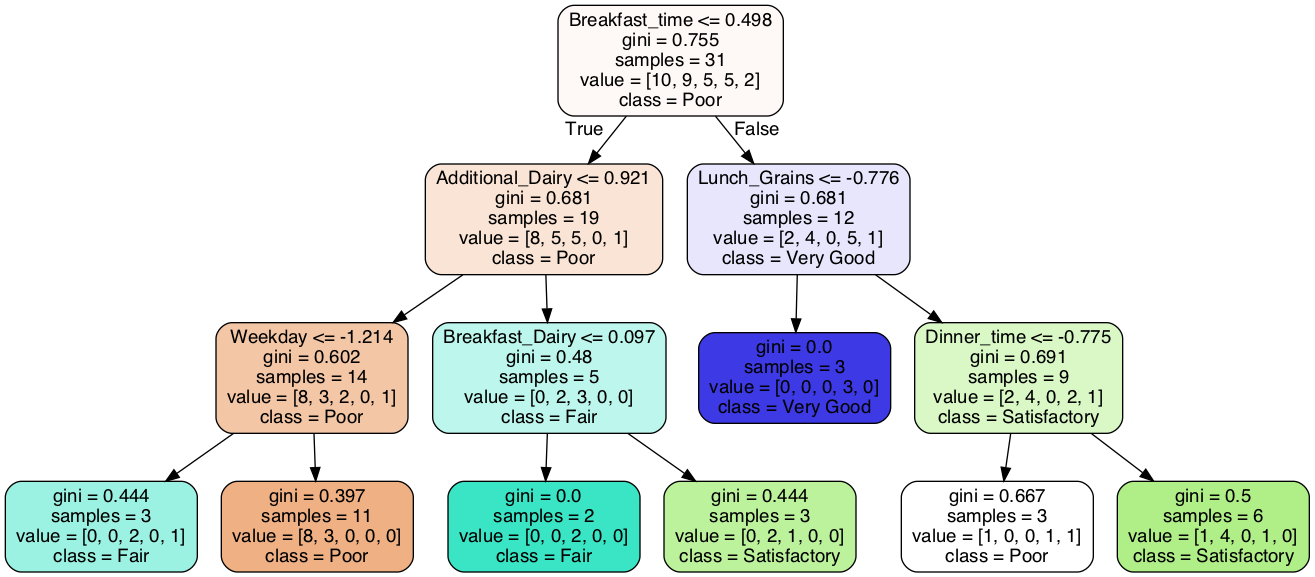

In [262]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

#classe_names = tree.classes_
class_names =["Poor", "Satisfactory", "Fair", "Very Good", "Excellent"]
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           #class_names=True,
                           class_names = class_names,
                           feature_names=X_train.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 

### Calculating the micro-average and macro-average F1 score

In [266]:
from sklearn.metrics import f1_score
models = [logreg, svm, tree, forest, gbrt]
model_names = ["logreg", "svm", "tree","forest", "gbrt"]
for i in range(len(models)):
    y_pred = models[i].predict(X_test_prepared)
    micro_f1 =f1_score(y_test_prepared, y_pred, average='micro')
    #macro_f1 =f1_score(y_test_prepared, y_pred, average='macro')
    print(model_names[i], "Micro-average F1 score: ", micro_f1)
    #print(model_names[i], "Micro-average F1 score: ", macro_f1)


logreg Micro-average F1 score:  0.25
svm Micro-average F1 score:  0.5
tree Micro-average F1 score:  0.5
forest Micro-average F1 score:  0.625
gbrt Micro-average F1 score:  0.625


In [280]:
y_test_prepared

array([1, 3, 0, 1, 0, 1, 0, 2])

In [281]:
logreg.predict_proba(X_test_prepared)

array([[5.92743546e-11, 4.11512646e-10, 3.63129959e-01, 7.97982474e-03,
        6.28890216e-01],
       [1.31380296e-05, 6.81654774e-19, 2.41584182e-01, 7.52064291e-01,
        6.33838831e-03],
       [4.69446105e-01, 9.07435931e-02, 4.39051772e-01, 8.90529546e-06,
        7.49624640e-04],
       [9.81331586e-01, 6.53034875e-06, 3.60159903e-08, 1.83919040e-02,
        2.69943527e-04],
       [1.88573272e-01, 2.74756997e-04, 5.13788240e-02, 7.24771793e-01,
        3.50013541e-02],
       [9.33964352e-01, 2.11877860e-08, 6.28101765e-02, 2.90035638e-05,
        3.19644691e-03],
       [4.99754508e-01, 4.99754524e-01, 9.28514541e-12, 7.97965388e-13,
        4.90967965e-04],
       [9.85949580e-01, 1.15448746e-02, 2.32454118e-03, 3.45916784e-07,
        1.80658321e-04]])

ValueError: Found input variables with inconsistent numbers of samples: [32, 40]

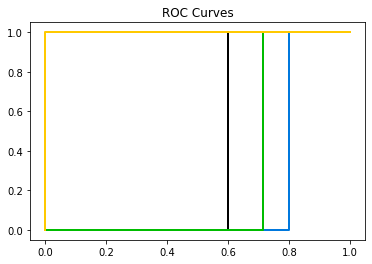

In [282]:
import scikitplot as skplt
y_true = y_test_prepared  #ground truth labels
y_probas = logreg.predict_proba(X_test_prepared) # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas)
plt.title('ROC Curve of Logistic Regression')
plt.show()